    📚공부 자료
        ✔0_velog 안영우님 "이것이 코딩테스트다" 시리즈
        ✔나동빈님 "이것이 코딩테스트다" 강의    
# **💰 13. 순차 탐색과 이진 탐색**
--------
이진 탐색 알고리즘을 배워보기 전, 기본 탐색 방법인 순차 탐색에 대해 먼저 알아보자.   

## **💸 순차 탐색(Sequential Search)**
리스트 안에 있는 특정한 데이터를 찾기 위해 앞에서 부터 데이터를 하나씩 차례대로 확인하는 방법.    
말 그대로 **순차적으로 데이터를 방문하는 방법**이다.    
주로 정렬되지 않은 배열에서 쓰는데, 시간만 있다면 원하는 데이터를 항상 찾을 수 있으나... 코테에서는 주어진 시간이 있으니 잘 판단해서 써야 한다.    
<code>count()</code>메서드 사용할 때 순차 탐색이 이용된다.    



In [ ]:
# 순차 탐색
def sequential_search(n, target, array):
    for i in range(n):
        if array[i] == target:
            return i+1

l = tuple(map(int,input().split()))
n = l[0]
target = l[1]

print('찾을 숫자: %d' %target)
print(sequential_search(n, target, l),'번째 수')

4 2 5 1
찾을 숫자: 2
2 번째 수


정렬 여부와 상관 없이 앞에서부더 쭉 확인해야 하기 대문에, 데이터가 N개일 때 N개를 다 봐야 되므로 시간복잡도는 **O(N)**.

<br><br>


## **💸 이진 탐색(Binary Search)**
오늘의 메인!   
배열 **내부의 데이터가 정렬돼 있어야**만 사용 가능한 알고리즘.   
퀵정렬, 합병 정렬과 비슷하게 **탐색 범위를 절반씩 좁혀가며** 데이터 탐색함.

우선 요약하자면, 이진탐색은 위치를 나타내는 변수 **시작점, 끝점, 중간점**을 활용하는데, **찾으려는 데이터**와 **중간점에 있는 데이터**를 **반복적으로 비교**해서 원하는 데이터를 찾는다.    

>- 찾고자 하는 수 보다 중간점이 크면 중간점부터 끝점까지의 원소는 볼 필요가 없다
>- 찾고자 하는 수보다 중간점이 작으면 시작점부터 중간점까지의 원소는 볼 필요가 없다

데이터를 한 번 확인할 때 마다 원소의 개수가 절반씩 감소하므로, 시간복잡도는 **O(logN).**    

이진탐색 구현 방법으로는 재귀함수를 이용한 구현, 반복문을 이용한 구현이 있다.
<br><br>

### **💳 1. 재귀함수를 이용한 구현**

In [ ]:
def binary_search(array, start, target, end):
    #찾고 싶은 게 배열에 없는 경우
    if(end<start):
        return None
    mid = (start+end)//2
    if(array[mid] == target):
        return mid
    elif(array[mid]>target):
        return binary_search(array, start, target, mid-1)
    else:
        return binary_search(array, mid+1, target, end)

#원소 개수, 찾고자 하는 값
n, target = list(map(int, input().split()))
#배열 입력받기
array = list(map(int, input().split()))

result = binary_search(array, 0, target, n-1)
if result == None:
    print("원소가 존재하지 않습니다.")
else:
    print("target: %2d 인덱스: %2d" % (target, result))

10 7
1 3 5 7 9 11 13 15 17 19
target:  7 인덱스:  3


### **💳 2. 반복문을 이용한 구현**

In [ ]:
def binary_search(array, start, target, end):
    while start <= end:
        mid = (start+end)//2
        if(array[mid] == target):
            return mid
        elif(array[mid] > target):
            end = mid-1
        else:
            start = mid+1
    return None

#원소 개수, 찾고자 하는 값
n, target = list(map(int, input().split()))
#배열 입력받기
array = list(map(int, input().split()))

result = binary_search(array, 0, target, n-1)
if result == None:
    print("원소가 존재하지 않습니다.")
else:
    print("target: %2d 인덱스: %2d" % (target, result))

10 7
1 3 5 6 9 11 13 15 17 19
원소가 존재하지 않습니다.


### **💳 추가) 반복문을 이용한 구현 - C++**

```cpp
#include <bit/stdc++.h> // 우리가 자주 쓸만한 헤더파일들을 몽땅 다 include 해놓은 헤더파일

using namespace std; // c#의 namespace 생각하면 된다
                     // std namespace에 cout, cin등 자주 쓰이는 함수들이 정의되어 있다
                     // using std로 선언할 경우 만약 cout를 쓴다 하면
                     //std::count 이런식으로 표시를 해 줘야 한다

int binarySearch(vector<int>& arr, int target, int start, int end)
//vector: 자동으로 메모리가 할당되는 배열
{
    while(start <= end)
    {
        int mid = (start + end) / 2;
        if (arr[mid] == target) return mid;
        else if (arr[mid]>target) end = mid - 1;
        else start = mid + 1
    }
}
```

### **💳 Python의 이진 탐색 라이브러리**
- **bisect_left(a, x)**: 정렬된 순서를 유지하면서 배열 a의 가장 왼쪽 x의 인덱스를 반환(C++의 lower_bound와 동일)
- **bisect_right(a, x)**: 정렬된 순서를 유지하면서 배열 a의 가장 오른쪽 x의 인덱스를 반환(C++의 upper_bound와 동일)


In [ ]:
from bisect import bisect_right, bisect_left

a = [1, 2, 4, 4, 8]
x = 4

print(bisect_left(a, x))
print(bisect_right(a, x))

2
4


#### **💵 이진 탐색 라이브러리 응용 - 특정 범위에 속하는 데이터 개수 구하기**


In [ ]:
from bisect import bisect_left, bisect_right

def count_by_range(a, left_value, right_value):
    #bisect_right - bisect_left로 사이에 몇 개의 데이터가 있는지 구한다..
    right_idx = bisect_right(a, right_value)
    left_idx = bisect_left(a, left_value)
    return right_idx - left_idx

a = [1, 2, 3, 3, 3, 3, 4, 4, 8, 9]

# 값이 4인 데이터 개수 출력
print(count_by_range(a, 4, 4))
# 값이 [1, 3] 범위에 있는 데이터 개수 출력
print(count_by_range(a, 1, 3)) #존재하지 않는 수를 집어넣으면 0을 반환한다.

2
6


이진 탐색 활용하는 문제가 나올 때 Parametric Search유형으로 많이 나온다.

### **💳 파라메트릭 서치(Parametric Search)**
최적화 문제를 결정 문제('예', '아니오')로 바꿔 해결하는 기법.    

최적화 문제란? 어떤 함수의 값을 가장 낮추거나, 가장 높이는 문제   

최적화 문제를 여러 번의 결정 문제로 바꿔서 해결한다.   

예를 들면, 특정한 조건을 만족하는 가장 알맞은 값을 빠르게 찾는 최적화 문제를 들 수 있음.   
일반적으로 코테에서 파라메트릭 서치 문제는 이진 탐색을 이용해 풀 수 있다.

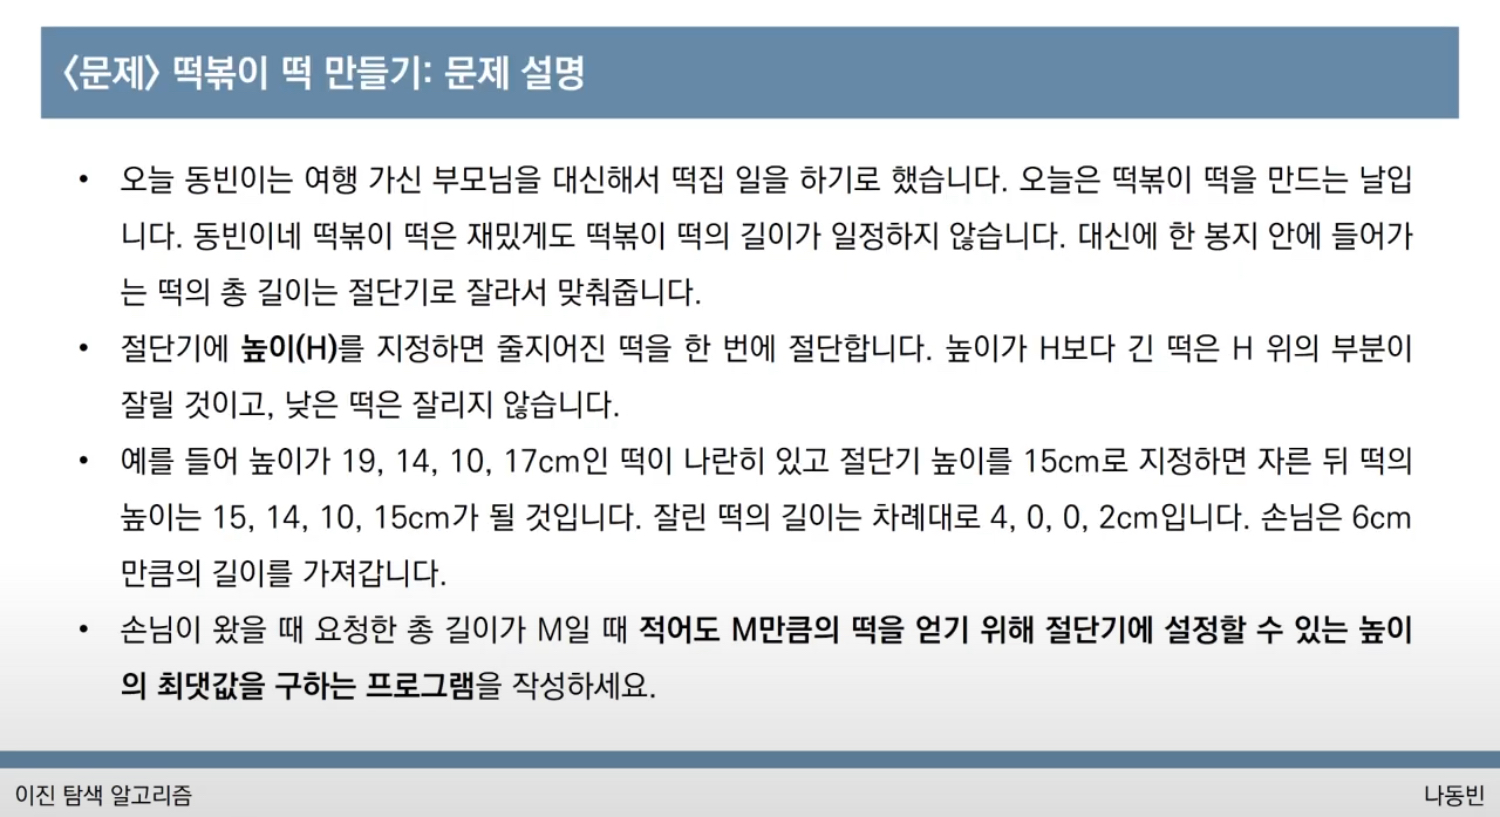

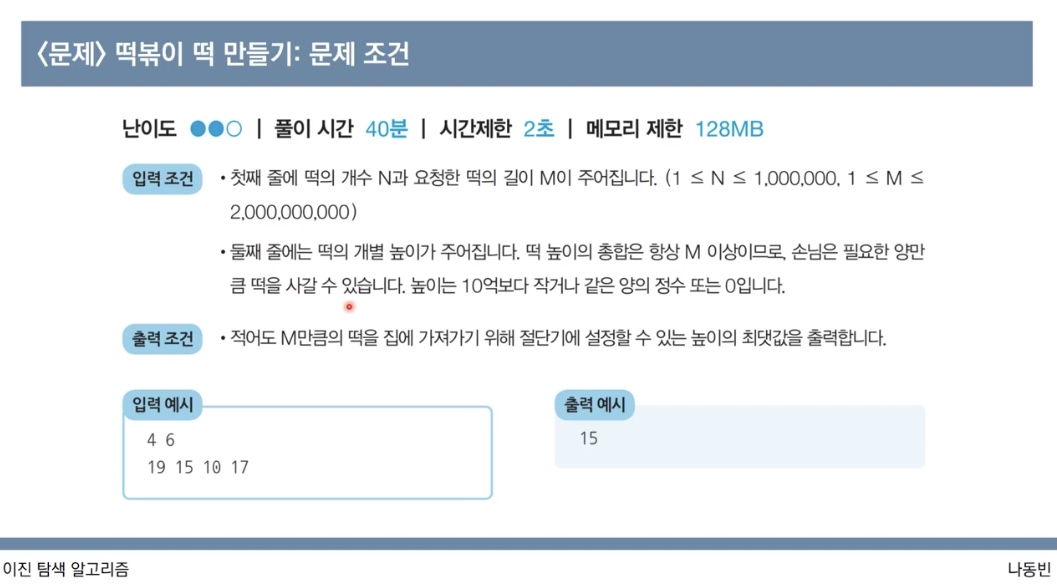

In [ ]:
#풀이

def binary_search(array, height, start, target, end):
    result=0
    while(start<=end):
        mid = (start+end)//2
        total=0
        for i in range(n):
            if(array[i]>height[mid]):
                total+= abs(array[i]-height[mid])
        if(total < target):
            end = mid-1
        else:# 적어도 M만큼 == M이거나 M에 가까운 M이하의 수
            result = height[mid] # 무조건 정답이 M이어야 하는 줄 알았다..
            start = mid+1
    return result


n, m =  map(int, input().split())
array = list(map(int, input().split()))
array.sort()

height = [x for x in range(0, array[-1]+1)]#나는 array의 min값부터 시작하면
               #가장 큰 값이 결과로 나오겠구나라는 미친 생각을 해서 틀렸다..
               #나올 수 있는 모든 경우의 수를 생각하는 습관을 들여야겠다
result = binary_search(array, height, 0, m, len(height)-1) #손 코딩을 한 후 꼼꼼하게 확인하자
print(result)

4 6
19 15 10 17
15


In [ ]:
# 백준 2110번 - 공유기 설치
# 어려웠다.. 거의 다 왔는데 잘못 생각한 부분이 있어서..!!
n, m = map(int, input().split())
array = []
dist = [0]*n
for i in range(n):
    array.append(int(input()))
# 일단 정렬을 한다
array.sort()
# 각 점 사이의 거리를 구한다. (나중에 반복문 돌릴 때 공유기 마지막으로 설치해놓은 곳 기억해 놓았다가 빼도 된다.)
for i in range(1, n):
    dist[i] = array[i] - array[i-1]

# start에서 end까지의 수 중 가장 공유기를 분배를 잘 할 수 있는 최소 거리의 최대값을 이진 탐색으로 구한다
start=1 #가장 작은수를 1로 초기화
end=array[-1]-array[0] #최대 길이
result = dist[0]

while(start<=end):
    num=0
    cnt=1
    mid = (start+ end)//2
    for i in range(n):
        num+=dist[i]
        if(num >= mid):
            cnt+=1
            num=0
    if(m > cnt): # 처음에 m!=cnt로 감싸줬다가 원하는 결과가 나오지 않았다
        end = mid-1
    else: #작거나 같으면 일단 result로 넣는다.
        result = mid # 최종적으로 이분탐색이 끝났을 때 가능한 답 중 최대값, 즉 가능한 답 중 Upperbound가 mid 값이 된다고 한다.
                     # 어차피 mid가 Upperbound값이 최종적으로 들어갈테니까, 작거나 같으면 그냥 result로
        start = mid+1

print(result)

9 3
1
2
3
4
5
6
7
8
100
7
